In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [13]:
df = pd.read_csv('../Data/data_handledMissingValues.csv')
df = df.drop(columns = 'Unnamed: 0')
df

,State,NAICS,Term,NoEmp,NewExist,LowDoc,MIS_Status,SBA_GrPortion
0,IN,45.0,84,4,1.0,Y,P I F,0.80
1,IN,72.0,60,2,1.0,Y,P I F,0.80
2,IN,62.0,180,7,0.0,N,P I F,0.75
3,CT,33.0,120,19,0.0,N,P I F,0.75
4,FL,81.0,84,1,1.0,Y,P I F,0.80
...,...,...,...,...,...,...,...,...
691393,MD,33.0,60,20,0.0,N,P I F,0.50
691394,CA,31.0,36,40,0.0,N,P I F,0.75
691395,OH,45.0,60,6,0.0,N,P I F,0.80
691396,OH,45.0,60,6,0.0,N,P I F,0.50


In [5]:
df.head(5)

,City,State,NAICS,Term,NoEmp,NewExist,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,EVANSVILLE,IN,45.0,84,4,1.0,1,P I F,60000.0,48000.0
1,BLOOMINGTON,IN,62.0,180,7,0.0,0,P I F,287000.0,215250.0
2,PLAINVILLE,CT,33.0,120,19,0.0,0,P I F,517000.0,387750.0
3,SUMMERFIELD,FL,81.0,84,1,1.0,1,P I F,45000.0,36000.0
4,CHARLOTTE,NC,81.0,84,1,1.0,1,P I F,70000.0,56000.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691398 entries, 0 to 691397
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State          691398 non-null  object 
 1   NAICS          691398 non-null  float64
 2   Term           691398 non-null  int64  
 3   NoEmp          691398 non-null  int64  
 4   NewExist       691398 non-null  float64
 5   LowDoc         691398 non-null  object 
 6   MIS_Status     691398 non-null  object 
 7   SBA_GrPortion  691398 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 42.2+ MB


##### **1. Theory**
- **Standardization** and **Normalization** are used to rescale the data so that the values of different features are on a similar scale. This is important because many machine learning algorithms use distance-based metrics to determine the similarity between data points, and if one feature has a much larger range of values than another feature, it can dominate the distance calculation and bias the results.
- **Standardization** is often used when the data follows a Gaussian distribution, as it can preserve the shape of the distribution.
- **Normalization** is often used when the data has a skewed distribution or when there are outliers present in the data, as it can cope with these issues better than standardization

##### **2. Test for distribution**

In [15]:
box = [
 'Term',
 'NoEmp',
 ]
df[box].describe()

,Term,NoEmp
count,691398.000000,691398.00000
mean,103.014841,9.87384
std,74.807382,61.14238
min,0.000000,0.00000
25%,60.000000,2.00000
50%,84.000000,4.00000
75%,120.000000,9.00000
max,569.000000,9999.00000


###### **2.1 Remove Outliers**

In [16]:
data = df[box].copy()
for feature in box:
    multiplier = 1.5
    q1 = np.percentile(data[feature], 25)
    q3 = np.percentile(data[feature], 75)
    iqr = q3 - q1
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    print(feature, lower_bound, upper_bound)
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
filtered_data = data.reset_index().drop(columns= 'index')
filtered_data

Term -30.0 210.0
NoEmp -7.0 17.0


,Term,NoEmp
0,84,4
1,60,2
2,180,7
3,84,1
4,84,1
...,...,...
529198,108,1
529199,120,2
529200,180,2
529201,60,6


In [17]:
filtered_data.describe()

,Term,NoEmp
count,529203.000000,529203.000000
mean,75.045064,4.315773
std,36.161591,3.753021
min,0.000000,0.000000
25%,57.000000,2.000000
50%,84.000000,3.000000
75%,84.000000,6.000000
max,210.000000,17.000000


###### **2.2 Plot histogram**

In [76]:
import matplotlib.pyplot as plt
def histogram(df, feature, bin = 20):   
    plt.hist(df[feature], bins = bin)
    plt.title(feature)
    plt.show()

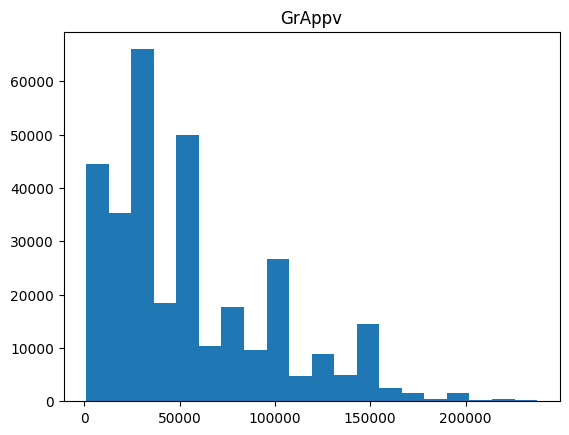

In [64]:
histogram(filtered_data, 'GrAppv')

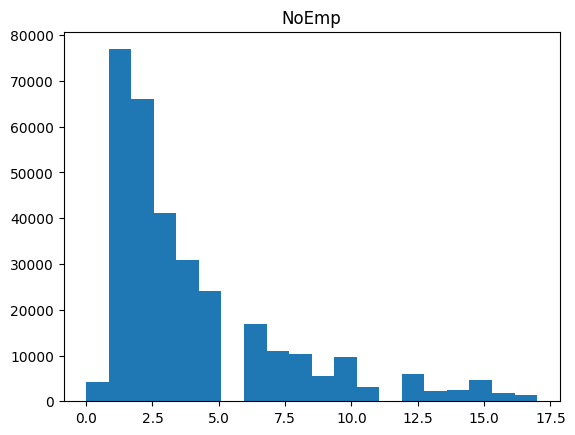

In [65]:
histogram(filtered_data, 'NoEmp')

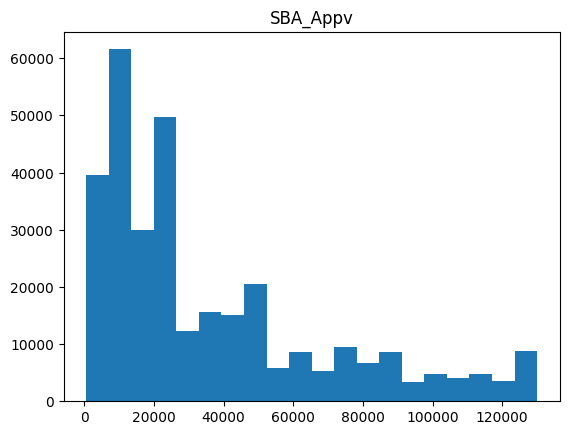

In [74]:
histogram(filtered_data, 'SBA_Appv', 20)

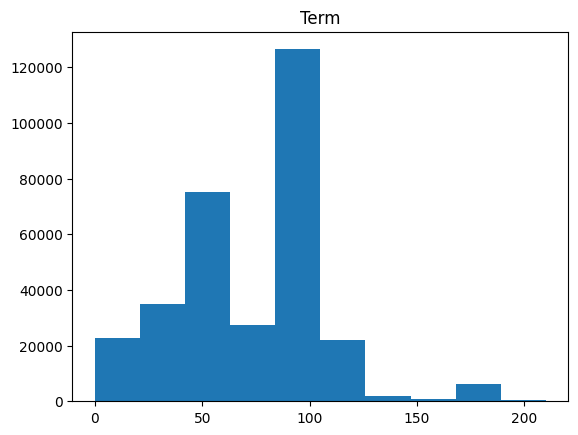

In [75]:
histogram(filtered_data, 'Term', 10)

###### **2.3 Conclusion**
- Our data does not follow a Gauss distribution, so we determine to use normalization to scale the data.

##### **3. Normalization**

In [77]:
box = [
 'Term',
 'NoEmp',
 'GrAppv',
 'SBA_Appv']
out_df = df.copy()
for feature in box:
        data = pd.DataFrame(df[feature])
        scaler = MinMaxScaler(feature_range=(0, 1))
        normalized = scaler.fit_transform(data)
        out_df[feature] = [float(x) for x in normalized]
out_df

,City,State,NAICS,Term,NoEmp,NewExist,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,EVANSVILLE,IN,45.0,0.147627,0.0004,2.0,Y,P I F,0.011802,0.010368
1,BLOOMINGTON,IN,62.0,0.316344,0.0007,1.0,N,P I F,0.057211,0.046873
2,PLAINVILLE,CT,33.0,0.210896,0.0019,1.0,N,P I F,0.103221,0.084525
3,SUMMERFIELD,FL,81.0,0.147627,0.0001,2.0,Y,P I F,0.008802,0.007749
4,CHARLOTTE,NC,81.0,0.147627,0.0001,2.0,Y,P I F,0.013803,0.012114
...,...,...,...,...,...,...,...,...,...,...
486639,OAKLAND,CA,32.0,0.421793,0.0008,1.0,N,P I F,0.037608,0.041144
486640,EDINA,MN,62.0,0.189807,0.0001,1.0,N,P I F,0.033607,0.027556
486641,CHARLESTON,SC,11.0,0.210896,0.0002,1.0,N,P I F,0.008802,0.004802
486642,BALTIMORE,MD,33.0,0.105448,0.0020,1.0,N,P I F,0.009802,0.005348


In [13]:
# out_df.to_csv('data_normalized.csv')